Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

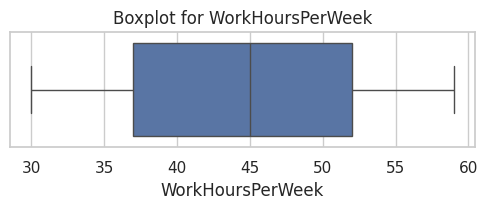

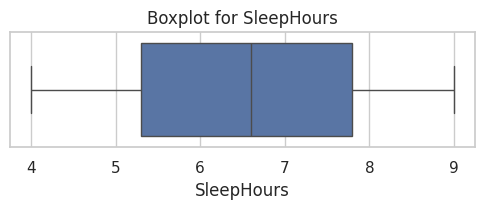

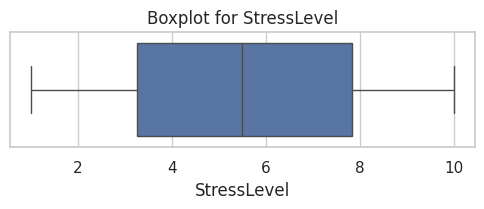

0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


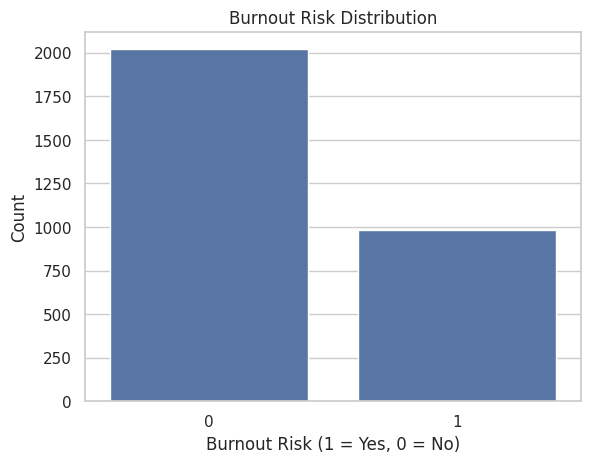

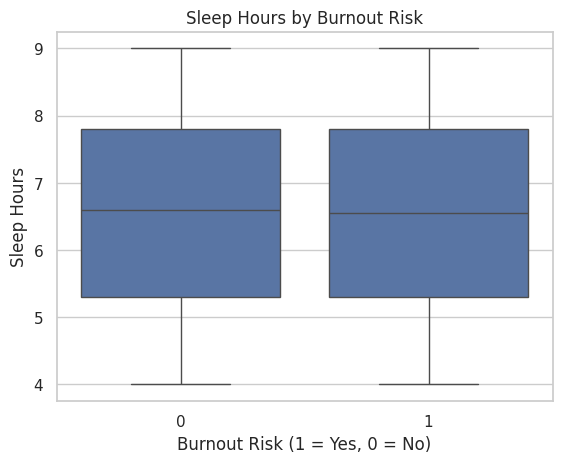

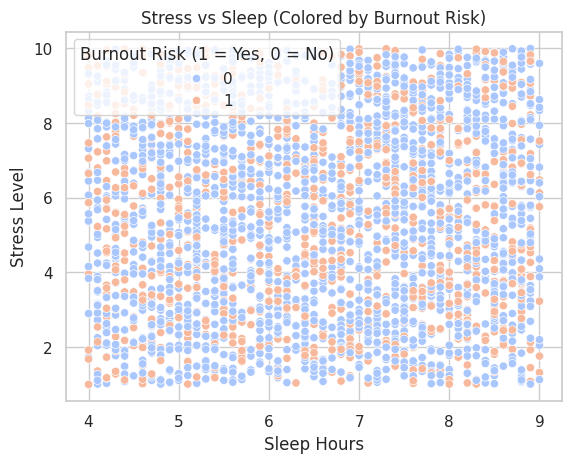

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

df = pd.read_csv("/mental_health_workplace_survey.csv")

# Preview first few rows
df.head()
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()
df.isnull().sum().sort_values(ascending=False)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)  # Replaces missing values with median
    print(f"Filled missing values in {col} with median: {median_val}")

# Handle categorical columns (object/string)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)    # Replaces missing values with most frequent value
    print(f"Filled missing values in {col} with mode: {mode_val}")


features = ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df


for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='BurnoutRisk', data=df)
plt.title("Burnout Risk Distribution")
plt.xlabel("Burnout Risk (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()



sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout Risk")
plt.xlabel("Burnout Risk (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()



sns.scatterplot(x='SleepHours', y='StressLevel', hue='BurnoutRisk', data=df, palette='coolwarm')
plt.title("Stress vs Sleep (Colored by Burnout Risk)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.legend(title="Burnout Risk (1 = Yes, 0 = No)")
plt.show()